# Hydrodynamics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 

Hydrodynamics provides the fundamental equations to describe the motion of a fluid. Note that a fluid can therby be a gas or a liquid. Gases and liquids may have completely different flow properties as in liquids the mean free path of a molecule is much smaller than the size of the liquif container. This is something, that is not alway true for gases. 

In fluid dynamics, we are interested in the motion of a value element of a fluid, which flows with a velocity $\vec{u}$. As the whole fluid moves, each volume element may have a different flow velocity, which results in a flow field $\vec{u}(\vec{r},t)$. Each component of the flow field depends now on each coordinate, i.e. 

$$
\vec{u}=
\begin{Bmatrix}
u(x,y,z,t)\\
v(x,y,z,t)\\
w(x,y,z,t)
\end{Bmatrix}
$$

In case of a stationary flow, the components do not explicitly depend on time, which means

$$
\frac{\partial \vec{u}}{\partial t}=0
$$

<div class="alert alert-warning">
**Streamline**
 
A streamline is a curve where each point on the curve has the same direction as $\vec{u}$ without requiring the $\vec{u}$ is constant along the streamline. This means that there are no perpendicular velocity components along a streamline, i.e. $d\vec{r}\times \vec{u}=0$.
     
![Streamtube](./img/stream.png)   
</div>

When we now follow the motion of a fluid element in space and time we notice that a change in the velocity $d\vec{u}$ can be achieved by

$$
d\vec{u}=\frac{\partial \vec{u}}{\partial t}\bigg|_{\vec{r}}dt+\frac{\partial \vec{u}}{\partial x}\bigg|_{\vec{r}}dx+\frac{\partial \vec{u}}{\partial y}\bigg|_{\vec{r}}dy+\frac{\partial \vec{u}}{\partial z}\bigg|_{\vec{r}}dz
$$

which when dividing by $dt$ results in

\begin{eqnarray}
\frac{d\vec{u}}{dt} &= &\frac{\partial \vec{u}}{\partial t}+\frac{\partial \vec{u}}{\partial x}\frac{dx}{dt}+\frac{\partial \vec{u}}{\partial y}\frac{dy}{dt}+\frac{\partial \vec{u}}{\partial z}\frac{dz}{dt}\\
&=& \frac{\partial \vec{u}}{\partial t}+(\vec{u}\cdot \nabla)\vec{u}
\end{eqnarray}

This is the total derivative, which is called the *substantial derivative*:

$$
\frac{D}{Dt}=\frac{\partial}{\partial t} + \vec{u}\nabla 
$$

and states, that a change in the velocity can be caused by a temporal change but also by a convective motion (different places have different velocities). The term $\vec{u}\nabla $ is therefore called the *convective derivative*.

## Navier Stokes Equation

We obtain a force density from the above equations if we multiply the above derived velocity change with the mass density $\rho$ of the fluid. This force density is the result of all possible forces that are present in the system. We thus have to consider possible forces on a volume element. 

**a) We would like to simplify our considerations by assuming an incompressibility of the liquid, i.e.**

$$
\nabla \cdot \vec{u}=0 \tag{incompressibility}
$$

**b) One of the causes of a flow could be a pressure acting on the surface of a volume element**

![Surface](./img/surface.png)

If the pressure $p$ acts on the surface we have for a surface element $\delta S$ with a normal vector $\hat{n}$ a force $-\hat{n}p\delta S$ on the surface element. If we integrate the force over the whole surface we can write

$$
-\oint p\hat{n}\delta S = -\int \nabla p dV
$$

stating the the integral of the pressure over the whole surface should amount for the volume integral (over the volume enclosed by the surface) of the gradient pressure. Thus the net force cause by a pressure gradient is $-\nabla p dV$ and the pressure gradient is just the force density.

$$
-\nabla p \tag{pressure force density}
$$

**c) Additionally, flow may be caused by external forces, like gravity (or others)**

The force density by an external force, like gravity is just given by

$$
\rho \vec{g} \tag{external force density }
$$
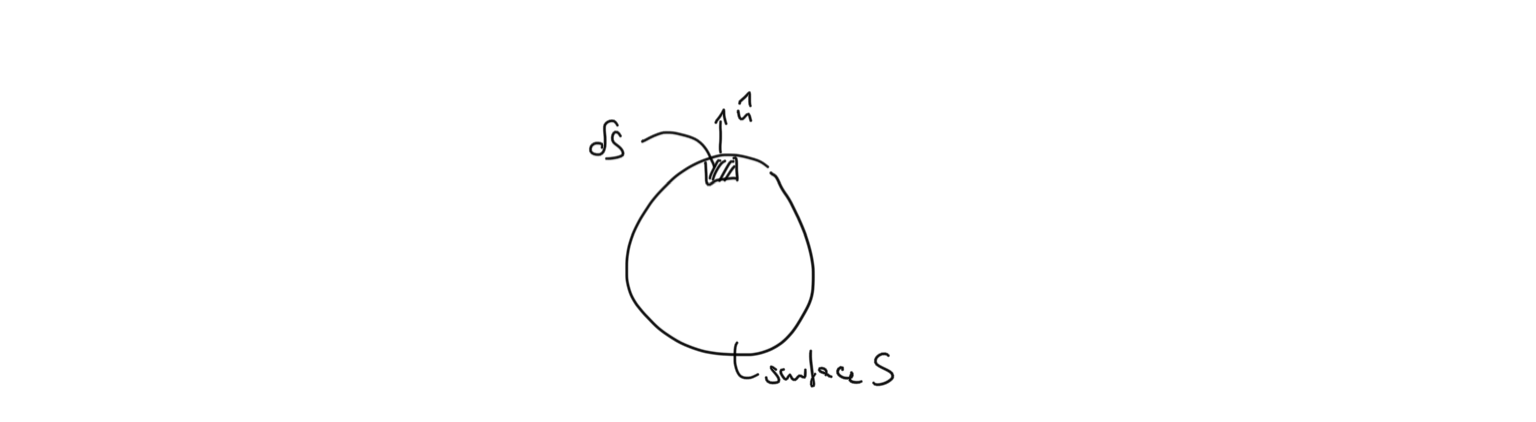
The sum of these components of the force density make up the **Euler equation** 

\begin{equation}
\rho \frac{D\vec{u}}{Dt}=\rho \left [\frac{\partial \vec{u}}{\partial t} +(\vec{u}\nabla)\vec{u}\right ]=-\nabla p + \rho \vec{g} \tag{Euler equation}
\end{equation}

The Euler equation describes the flow of ideal fluids due to pressure gradients or external forces. It is, however, only valid for ideal fluids with no internal friction. Thus, it essentially describes the flow of dilute gases or superfluids like superfluid Helium. 

To go beyond that limitation, we have to introduce frction into the equations. Since this is a good occasion, we will introduce the stress tensor at the same time, which is expressing all possible force on a volume element of a fluid.  

**d) Introduce internal friction**

Let's consider the following system with two fluid sheets, which only have a constant velocity component along the x-direction, i.e. $\vec{u}=\{u(y),0,0\}$ and $\partial u(y)/\partial x=0$.

![viscosity](./img/viscosity.png)

The sheet at $y$ moves along the x-direction with a speed $u(y)$. The sheet at $y+\Delta y$, which is $\Delta y$ away from the otehr sheet moves with a speed $u(y+\Delta y)$. Consider now the momentum $\vec{p}=\{m u(y),0,0 \}$ of the fluid sheet (don't confuse with the pressure $p$). The total momentum change $d\vec{p}$ can be written as a substantial derivative

\begin{equation}
d\vec{p}=\frac{\partial \vec{p}}{\partial t}dt +\underbrace{\frac{\partial \vec{p}}{\partial x}dx}_{=0} + \frac{\partial \vec{p}}{\partial y}dy+\underbrace{\frac{\partial \vec{p}}{\partial z}dz}_{=0}
\end{equation}

from which we obtain

\begin{equation}
\frac{d\vec{p}}{dt}=\frac{\partial \vec{p}}{\partial t}+\frac{\partial \vec{p}}{\partial y}\frac{dy}{dt}=\frac{\partial m u(y)}{\partial y}\frac{dy}{dt}
\end{equation}

which is a force. This is the force that is responsible for the change in the fluid velocity along the y direction, which is parallel to the x-direction.

![Stress](./img/stress.png)

Such a force tangential to an area in the direction of motion is called a shear stress $\tau$, i.e.

\begin{equation}
\tau=\frac{F}{A}=\frac{1}{A}\frac{d\vec{p}}{dt}=\underbrace{\frac{dy}{dt}\frac{\partial m u(y)}{\partial y}}_{\frac{d\vec{p}}{dt}}\frac{1}{A}
\end{equation}

With $m=\rho V$ and $v=A L$ this turns into 

\begin{equation}
\tau=\underbrace{L\frac{dy}{dt}}_{\frac{m^2}{s}}\frac{\partial \rho u(y)}{\partial y}
\end{equation}

where $\rho u(y)$ indicates a momentum density. This equation is actually a diffusion equation. On the left side we have a momentum current density ($\tau$) and on the right side a momentum density gradient, which is multiplied by a prefactor with a unit of the diffusion coefficient. This prefactor, the momentum diffusion coefficient, is the kinematic viscosity 

$$
\nu=\frac{\eta}{\rho} \tag{kinematic viscosity}
$$

and thus

\begin{equation}
\tau_{yx}=\frac{\eta}{\rho}\frac{\partial \rho u(y)}{\partial y}=\eta \frac{\partial u(y)}{dy}
\end{equation}

wher I have sneaked in the **dynamic viscosity** $\eta$ and the index $yx$, as this is one element of the stress tensor for a momentum transport along the y-axis when stresses are applied along the x-axis. 


### Viscous Stress Tensor

A similar treatment can be done for other velocity and force components can be done as well to construct the so-called visous stress tensor, which contains all the viscous stress components. They are 

\begin{eqnarray}
\tau_{xy}=\tau_{yx}&=&\eta \left ( \frac{\partial u}{\partial y} +\frac{\partial v}{\partial x}\right )\\
\tau_{xz}=\tau_{zx}&=&\eta \left ( \frac{\partial u}{\partial z} +\frac{\partial w}{\partial x}\right )\\
\tau_{yz}=\tau_{zy}&=&\eta \left ( \frac{\partial v}{\partial z} +\frac{\partial w}{\partial y}\right )
\end{eqnarray}

for the off-diagonal elements and 

\begin{eqnarray}
\tau_{xx}&=&2\eta \frac{\partial u }{\partial x}\\
\tau_{yy}&=&2\eta \frac{\partial v }{\partial y}\\
\tau_{zz}&=&2\eta \frac{\partial w }{\partial z}
\end{eqnarray}

for the diagonal elements. Together they create the viscous stress tensor 

\begin{equation}
\tau=\begin{bmatrix}
\tau_{xx} & \tau_{xy} & \tau_{xz}\\
\tau_{yx} & \tau_{yy} & \tau_{yz}\\
\tau_{zx} & \tau_{zy} & \tau_{zz}
\end{bmatrix}
\end{equation}

which is, as you see from the equations a symmetric tensor. 

So far we have only considered the situation where $\eta/\rho={\rm const.}$, without saying it. This situation actually corresponds to what we call **Newtonian Liquids**. The transport coefficient for the momentum is constant in this case.

More generall, the transport coefficient may depend on the *shear rate* $\frac{\partial u}{\partial y},\ldots$. Thus we write more generally 


\begin{equation}
\tau_{yx}=k\left( \frac{\partial u}{\partial y} \right)^n
\end{equation}

where $k$ is the so-called *consistency index* and $n$ is the *flow behavior index*. The above equation can be transformed into 

\begin{equation}
\tau_{yx}=\underbrace{k\left( \frac{\partial u}{\partial y} \right)^{n-1} }_{\rm apparent\, viscosity} \frac{\partial u}{\partial y}
\end{equation}

which takes the known form of the momentum diffusion equation with a shear rate  dependent prefactor, which is the momentum diffusion coefficient or the *apparent viscosity*. 

Depending on the shear rate dependence of the apparent viscosity, we can now classify liquids into 

- Newtonian liquids
- Non-Newtonian liquids
    - shear thinning (ketchup)
    - shear thickening (corn starch)